In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ['CUDA_VISIBLE_DEVICES'] = '2, 3'

In [17]:
df_corr = pd.read_csv('./data/corrected_df.csv')

In [8]:
df_corr

,title,poster_url,synopsis,genre,poster_location,cats
0,Black Panther: Wakanda Forever,https://m.media-amazon.com/images/M/MV5BNTM4Nj...,The people of Wakanda fight to protect their h...,action,./data/images/action/black_panther__wakanda_fo...,Action Adventure Drama
1,Andor,https://m.media-amazon.com/images/M/MV5BNDgxNT...,Prequel series to Star Wars' 'Rogue One'. In a...,action,./data/images/action/andor.jpg,Action Adventure Drama
2,Black Adam,https://m.media-amazon.com/images/M/MV5BYzZkOG...,"Nearly 5,000 years after he was bestowed with ...",action,./data/images/action/black_adam.jpg,Action Adventure Fantasy
3,House of the Dragon,https://m.media-amazon.com/images/M/MV5BZjBiOG...,An internal succession war within House Targar...,action,./data/images/action/house_of_the_dragon.jpg,Action Adventure Drama
4,Warrior Nun,https://m.media-amazon.com/images/M/MV5BNjI1NT...,"After waking up in a morgue, an orphaned teen ...",action,./data/images/action/warrior_nun.jpg,Action Drama Fantasy
...,...,...,...,...,...,...
8395,The Outlaw,https://m.media-amazon.com/images/M/MV5BM2NmYW...,"Western legends Pat Garrett, Doc Holliday and ...",western,./data/images/western/the_outlaw.jpg,Western
8396,The Man from the Alamo,https://m.media-amazon.com/images/M/MV5BYzRmYj...,"During the Alamo siege, John Stroud is sent to...",western,./data/images/western/the_man_from_the_alamo.jpg,Drama Western
8397,A Lawless Street,https://m.media-amazon.com/images/M/MV5BOWQxYT...,Marshal Calem Ware (Randolph Scott) must face ...,western,./data/images/western/a_lawless_street.jpg,Western
8398,Showdown,https://m.media-amazon.com/images/M/MV5BM2IwZW...,"A cowboy has to get 12,000 dollars in stolen b...",western,./data/images/western/showdown.jpg,Western


In [9]:
df_corr.isna().sum()

title               0
poster_url          1
synopsis           28
genre               0
poster_location     0
cats                3
dtype: int64

In [18]:
df_corr = df_corr.dropna()

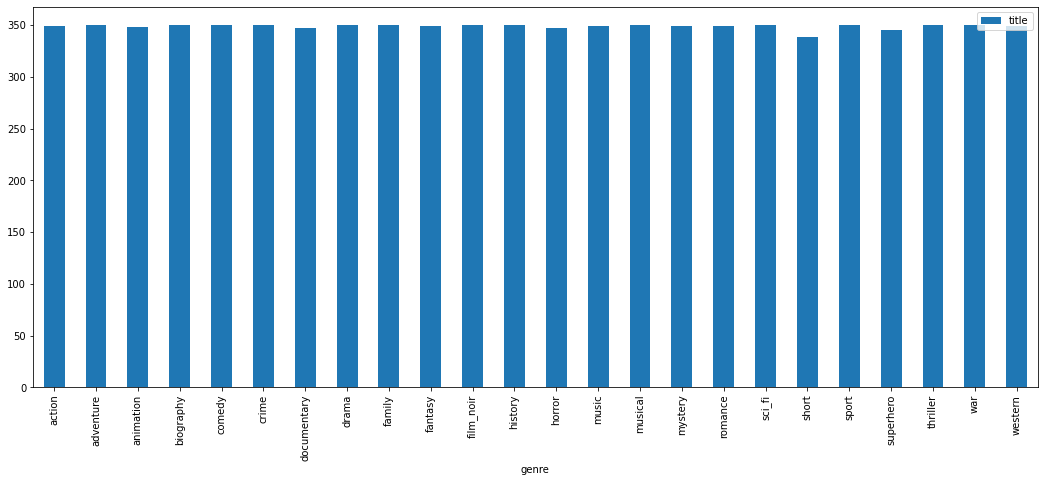

In [7]:
df_corr.pivot_table(index="genre", values="title", aggfunc="count").plot(kind="bar", figsize=(18, 7))
plt.show()

In [23]:
categories = [
    "action",
    "adventure",
    "animation",
    "biography",
    "comedy",
    "crime",
    "documentary",
    "drama",
    "family",
    "fantasy",
    "film-noir",
    "history",
    "horror",
    "music",
    "musical",
    "mystery",
    "romance",
    "sci-fi",
    "short",
    "sport",
    "superhero",
    "thriller",
    "war",
    "western"
    ]

To solve multilabel task

In [3]:
def code_genres(cats):
    cats = cats.lower().split(' ')
    res = [0] * len(categories)
    for genre in cats:
        try:
            res[categories.index(genre)] = 1
        except ValueError:
            cats.remove(genre)
    return res

In [19]:
df_corr['target'] = df_corr['cats'].apply(code_genres)

In [11]:
df_corr

,title,poster_url,synopsis,genre,poster_location,cats,target
0,Black Panther: Wakanda Forever,https://m.media-amazon.com/images/M/MV5BNTM4Nj...,The people of Wakanda fight to protect their h...,action,./data/images/action/black_panther__wakanda_fo...,Action Adventure Drama,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,Andor,https://m.media-amazon.com/images/M/MV5BNDgxNT...,Prequel series to Star Wars' 'Rogue One'. In a...,action,./data/images/action/andor.jpg,Action Adventure Drama,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,Black Adam,https://m.media-amazon.com/images/M/MV5BYzZkOG...,"Nearly 5,000 years after he was bestowed with ...",action,./data/images/action/black_adam.jpg,Action Adventure Fantasy,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,House of the Dragon,https://m.media-amazon.com/images/M/MV5BZjBiOG...,An internal succession war within House Targar...,action,./data/images/action/house_of_the_dragon.jpg,Action Adventure Drama,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,Warrior Nun,https://m.media-amazon.com/images/M/MV5BNjI1NT...,"After waking up in a morgue, an orphaned teen ...",action,./data/images/action/warrior_nun.jpg,Action Drama Fantasy,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
8395,The Outlaw,https://m.media-amazon.com/images/M/MV5BM2NmYW...,"Western legends Pat Garrett, Doc Holliday and ...",western,./data/images/western/the_outlaw.jpg,Western,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8396,The Man from the Alamo,https://m.media-amazon.com/images/M/MV5BYzRmYj...,"During the Alamo siege, John Stroud is sent to...",western,./data/images/western/the_man_from_the_alamo.jpg,Drama Western,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
8397,A Lawless Street,https://m.media-amazon.com/images/M/MV5BOWQxYT...,Marshal Calem Ware (Randolph Scott) must face ...,western,./data/images/western/a_lawless_street.jpg,Western,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8398,Showdown,https://m.media-amazon.com/images/M/MV5BM2IwZW...,"A cowboy has to get 12,000 dollars in stolen b...",western,./data/images/western/showdown.jpg,Western,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Train

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision


import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from torchmetrics.functional import  auroc
from pytorch_lightning.loggers import TensorBoardLogger

from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

/home/ismirnov/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
text_model = BertModel.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [9]:
class ImageDataset(Dataset):
    def __init__(self, df, transforms):
        self.df = df
        self.transforms = transforms
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        path = self.df.loc[idx, "poster_location"]
        image = Image.open(path).convert("RGB")
        synopsis = self.df.loc[idx, "synopsis"]
        
        label = torch.Tensor(self.df.loc[idx, "target"])
        
        sample = {"synopsis": synopsis, "image": transforms(image), "target": label}
        
        return sample

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_corr, train_size=0.8, shuffle=True, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [17]:
train_dataset = ImageDataset(train_df, transforms)
test_dataset = ImageDataset(test_df, transforms)

In [18]:
BATCH_SIZE = 32

loaders = {
    "train": torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True),
    "valid": torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False),
}

Print example of posters batch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

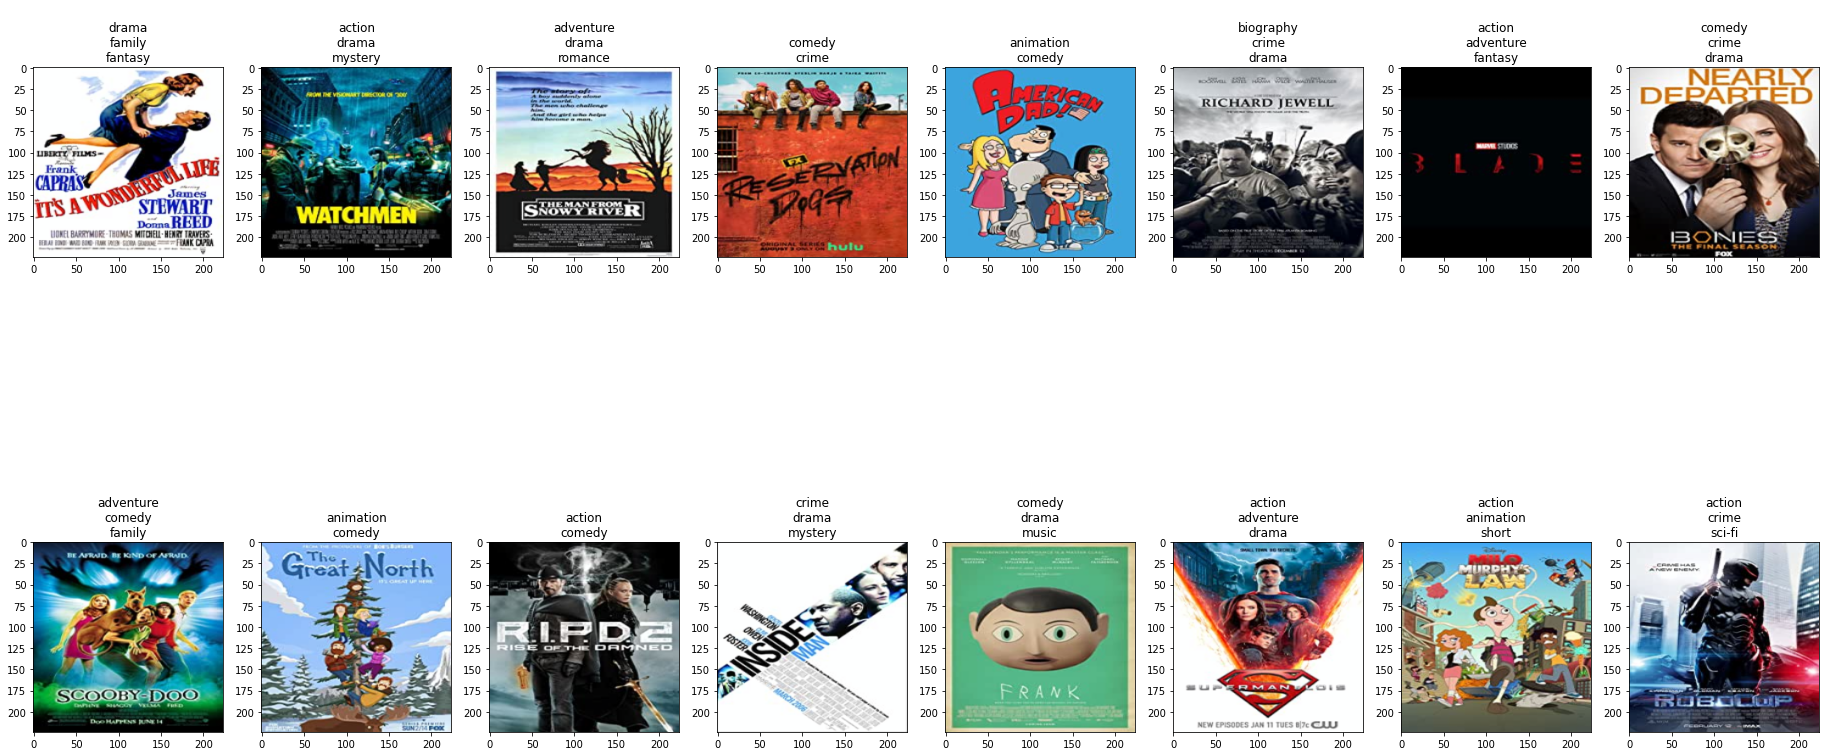

In [19]:
def illustrator(imgs, lbls):
    plt.figure(figsize=(32, 16))
    for i in range(len(lbls)):
        plt.subplot(2,8, i+1)
        im = imgs[i].numpy().transpose((1, 2, 0))  
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        im = std * im + mean
        plt.imshow(im)
        title = ''
        for j in range(len(lbls[i])):
            if lbls[i][j] == 1:
                title += '\n' + categories[j]
        plt.title(title)



example = next(iter(loaders["train"]))

illustrator(example['image'][:16], example['target'][:16])

In [89]:
MAX_TOKEN_COUNT = 128

token_counts = []
for _, row in train_df.iterrows():
  token_count = len(tokenizer.encode(
    row['synopsis'],
    max_length=MAX_TOKEN_COUNT,
    truncation=True
  ))
  token_counts.append(token_count)

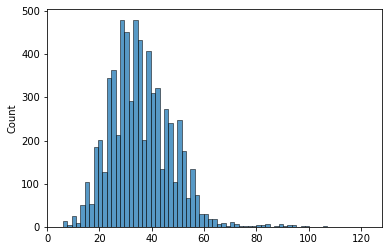

In [22]:
sns.histplot(token_counts)
plt.xlim([0, MAX_TOKEN_COUNT]);

In [12]:
class LabelDataset(Dataset):
  def __init__(
    self,
    data: pd.DataFrame,
    tokenizer: BertTokenizer,
    max_token_len: int = 128
  ):
    self.tokenizer = tokenizer
    self.data = data
    self.max_token_len = max_token_len
  def __len__(self):
    return len(self.data)
  def __getitem__(self, index: int):
    data_row = self.data.iloc[index]
    comment_text = data_row.synopsis
    labels = data_row['target']
    encoding = self.tokenizer.encode_plus(
      comment_text,
      add_special_tokens=True,
      max_length=self.max_token_len,
      return_token_type_ids=False,
      padding="max_length",
      truncation=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return dict(
      comment_text=comment_text,
      input_ids=encoding["input_ids"].flatten(),
      attention_mask=encoding["attention_mask"].flatten(),
      labels=torch.Tensor(labels)
    )

In [119]:
train_dataset = LabelDataset(
  train_df,
  tokenizer,
  max_token_len=MAX_TOKEN_COUNT
)
sample_item = train_dataset[0]
sample_item.keys()

dict_keys(['comment_text', 'input_ids', 'attention_mask', 'labels'])

In [120]:
sample_batch = next(iter(DataLoader(train_dataset, batch_size=BATCH_SIZE)))
sample_batch["input_ids"].shape, sample_batch["attention_mask"].shape

(torch.Size([32, 128]), torch.Size([32, 128]))

In [121]:
output = text_model(sample_batch["input_ids"], sample_batch["attention_mask"])

In [ ]:
class LabelDataModule(pl.LightningDataModule):
  def __init__(self, train_df, test_df, tokenizer, batch_size=BATCH_SIZE, max_token_len=128):
    super().__init__()
    self.batch_size = batch_size
    self.train_df = train_df
    self.test_df = test_df
    self.tokenizer = tokenizer
    self.max_token_len = max_token_len
  def setup(self, stage=None):
    self.train_dataset = LabelDataset(
      self.train_df,
      self.tokenizer,
      self.max_token_len
    )
    self.test_dataset = LabelDataset(
      self.test_df,
      self.tokenizer,
      self.max_token_len
    )
  def train_dataloader(self):
    return DataLoader(
      self.train_dataset,
      batch_size=self.batch_size,
      shuffle=True,
      num_workers=10
    )
  def val_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=10
    )
  def test_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=10
    )

In [122]:
N_EPOCHS = 20

data_module = LabelDataModule(
  train_df,
  test_df,
  tokenizer,
  batch_size=BATCH_SIZE,
  max_token_len=MAX_TOKEN_COUNT
)

In [6]:
class LabelTagger(pl.LightningModule):
  def __init__(self, n_classes: int, n_training_steps=None, n_warmup_steps=None):
    super().__init__()
    self.bert = text_model
    self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)
    self.n_training_steps = n_training_steps
    self.n_warmup_steps = n_warmup_steps
    self.criterion = nn.BCELoss()
  def forward(self, input_ids, attention_mask, labels=None):
    output = self.bert(input_ids, attention_mask=attention_mask)
    output = self.classifier(output.pooler_output)
    output = torch.sigmoid(output)
    loss = 0
    if labels is not None:
        loss = self.criterion(output, labels)
    return loss, output
  def training_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("train_loss", loss, prog_bar=True, logger=True)
    return {"loss": loss, "predictions": outputs, "labels": labels}
  def validation_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss
  def test_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss
  def training_epoch_end(self, outputs):
    labels = []
    predictions = []
    for output in outputs:
      for out_labels in output["labels"].detach().cpu():
        labels.append(out_labels)
      for out_predictions in output["predictions"].detach().cpu():
        predictions.append(out_predictions)
    labels = torch.stack(labels).int()
    predictions = torch.stack(predictions)
    for i, name in enumerate('target'):
      class_roc_auc = auroc(predictions[:, i], labels[:, i])
      self.logger.experiment.add_scalar(f"{name}_roc_auc/Train", class_roc_auc, self.current_epoch)
  def configure_optimizers(self):
    optimizer = AdamW(self.parameters(), lr=2e-5)
    scheduler = get_linear_schedule_with_warmup(
      optimizer,
      num_warmup_steps=self.n_warmup_steps,
      num_training_steps=self.n_training_steps
    )
    return dict(
      optimizer=optimizer,
      lr_scheduler=dict(
        scheduler=scheduler,
        interval='step'
      )
    )

In [123]:
steps_per_epoch=len(train_df) // BATCH_SIZE
total_training_steps = steps_per_epoch * N_EPOCHS
warmup_steps = total_training_steps // 5

In [ ]:
model = LabelTagger(
  n_classes=len(categories),
  n_warmup_steps=warmup_steps,
  n_training_steps=total_training_steps
)

In [102]:
checkpoint_callback = ModelCheckpoint(
  dirpath="checkpoints",
  filename="best-checkpoint",
  save_top_k=1,
  verbose=True,
  monitor="val_loss",
  mode="min"
)

In [103]:
logger = TensorBoardLogger("lightning_logs", name="genre")

In [104]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

In [107]:
trainer = pl.Trainer(
  logger=logger,
  checkpoint_callback=checkpoint_callback,
  callbacks=[early_stopping_callback],
  max_epochs=N_EPOCHS,
  gpus=1,
  progress_bar_refresh_rate=30
)

/home/ismirnov/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:151: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=<pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7efa605cdd90>)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=<pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7efa605cdd90>)`.
  rank_zero_deprecation(
/home/ismirnov/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:96: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=30)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  rank_zero_deprecation(
GPU available: True

In [ ]:
trainer.fit(model, data_module)

### Image model

In [22]:
image_model = torchvision.models.efficientnet_v2_m(pretraned=True)
image_model = image_model.to('cuda')

In [23]:
image_model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [24]:
image_model.classifier = nn.Sequential(
    nn.Linear(1280, 500),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.3),
    nn.Linear(500, 24)
)


In [25]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(image_model.parameters(), lr=0.0003)

In [41]:
def train(net, n_epoch=3):
    train_losses = []
    val_losses = []
    net = net.to('cuda')
    loss_fn = criterion

    for epoch in tqdm(range(n_epoch)):
        running_loss = 0.0
        train_dataiter = iter(loaders['train'])
        for batch in tqdm(train_dataiter):
            X_batch, y_batch = batch['image'], batch['target']
            net.train()
            optimizer.zero_grad()

            y_pred = net(X_batch.to('cuda'))
            loss = loss_fn(y_pred, y_batch.to('cuda'))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            train_losses.append(running_loss)
            
            net.eval()
            val_data = next(iter(loaders['valid']))
            X_val, y_val = val_data['image'], val_data['target']
            val_loss = loss_fn(net(X_val.to('cuda')).to('cuda'), y_val.to('cuda'))
            val_loss.backward()
            
            val_losses.append(val_loss.item())

            running_loss = 0.0

    print('Train finished')
    return net, train_losses, val_losses

In [42]:
torch.cuda.empty_cache()

In [43]:
image_model, train_loss, val_loss = train(image_model)

100%|██████████| 3/3 [13:29<00:00, 270.00s/it]

Train finished


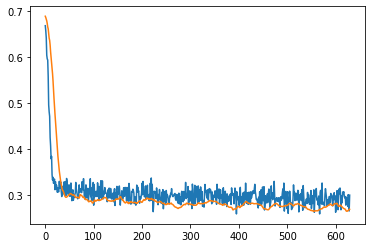

In [47]:
plt.plot(train_loss)
plt.plot(val_loss)

In [50]:
torch.save(image_model.state_dict(), 'image_model.pth')

In [11]:
image_model = torchvision.models.efficientnet_v2_m(pretrained=False)
image_model.classifier = nn.Sequential(
    nn.Linear(1280, 500),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.3),
    nn.Linear(500, 24)
)

checkpoint = torch.load("image_model.pth", map_location='cpu')
image_model.load_state_dict(checkpoint, strict=True)

image_model = image_model.eval()

/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


### Fusion of two models with CatBoost

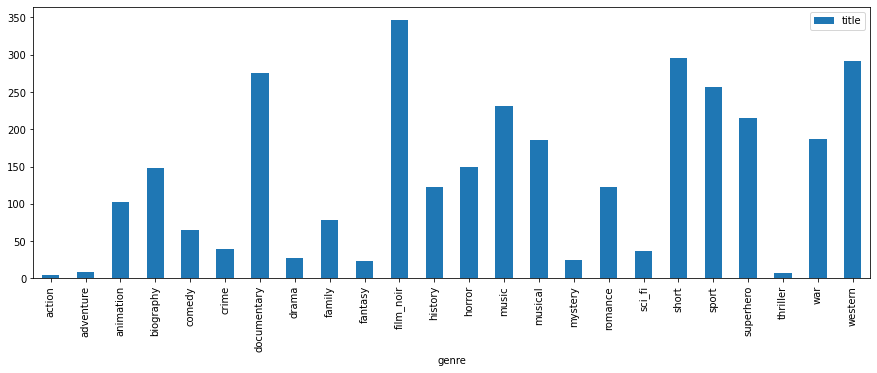

In [20]:
df_corr.drop_duplicates(subset=["poster_url"], keep=False, inplace=True)
df_corr.reset_index(drop=True, inplace=True)
df_corr.pivot_table(index="genre", values="title", aggfunc="count").plot(kind="bar", figsize=(15, 5))
plt.show()

train_df, test_df = train_test_split(df_corr, train_size=0.8, shuffle=True, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [7]:
TextModel = LabelTagger.load_from_checkpoint('./lightning_logs/genre/version_2/checkpoints/epoch=15-step=3360.ckpt', n_classes=24)

In [9]:
pred_text = []
for i in tqdm(test_fusion_df['synopsis']):
  encoding = tokenizer.encode_plus(
  i,
  add_special_tokens=True,
  max_length=128,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
  _, test_prediction = TextModel(encoding["input_ids"], encoding["attention_mask"])
  pred_text.append(test_prediction)
  

100%|██████████| 650/650 [00:40<00:00, 16.25it/s]


In [11]:
for n in range(len(pred_text)):
    try:
        pred_text[n] = pred_text[n][0].tolist()
    except:
        continue

In [14]:
test_fusion_df['predict_BERT'] = pred_text

In [16]:
test_fusion_df.to_csv('fusion_test.csv', index=False)

In [17]:
train_fusion_df = train_df[['title', 'synopsis', 'poster_location', 'target']]
test_fusion_df = test_df[['title', 'synopsis', 'poster_location', 'target']]

In [23]:
poster_predicts = []
for i in tqdm(test_df['poster_location']):
    image = transforms(Image.open(i).convert("RGB"))
    image.unsqueeze_(0)
    poster_predicts.append(image_model(image))

100%|██████████| 650/650 [03:06<00:00,  3.48it/s]


In [26]:
for n in range(len(poster_predicts)):
    poster_predicts[n] = poster_predicts[n][0].tolist()

In [8]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import pandas as pd
import numpy as np

In [6]:
optimized_params = {
    "depth": np.arange(1, 5),
    "learning_rate": np.arange(0.0001, 0.1),
    "l2_leaf_reg": np.arange(0.0001, 0.1),
}

In [82]:
CatClass = CatBoostClassifier(objective="MultiCrossEntropy", random_seed=42)

In [83]:
Cat_random = RandomizedSearchCV(CatClass, optimized_params, scoring="f1_micro",
cv=5)

In [88]:
targets = []
for i in train_fusion_df.target:
    targets.append(i)

In [89]:
import ast
for i in range(len(targets)):
    x = targets[i]
    x = ast.literal_eval(x)

    x = [n for n in x]
    targets[i] = x

In [90]:
for i in range(24):
    train_fusion_df[categories[i]] = np.array(targets)[:,i]

In [91]:
im_preds= []
for i in train_fusion_df.predict_CNN:
    im_preds.append(i)

In [92]:
import ast
for i in range(len(im_preds)):
    x = im_preds[i]
    x = ast.literal_eval(x)

    x = [n for n in x]
    im_preds[i] = x
    # for a in range(len(x)):
    #     x[a] = float(x[a])

In [93]:
for i in range(24):
    train_fusion_df[categories[i]+'_CNN'] = np.array(im_preds)[:,i]

In [94]:
text_preds = []
for i in train_fusion_df.predict_BERT:
    text_preds.append(i)

In [95]:
for i in range(len(text_preds)):
    x = text_preds[i]
    x = ast.literal_eval(x)

    x = [n for n in x]
    text_preds[i] = x

In [96]:
for i in range(24):
    train_fusion_df[categories[i]+'_BERT'] = np.array(text_preds)[:,i]

In [132]:
train_X = train_fusion_df.drop(['predict_CNN', 'predict_BERT','title','synopsis','target', 'poster_location', 'action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'superhero',
 'thriller',
 'war',
 'western'], axis=1)

In [133]:
train_y = train_fusion_df[['action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'superhero',
 'thriller',
 'war',
 'western']]

In [134]:
df = train_y[(train_y.T != 0).any()]

In [62]:
df

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,musical,mystery,romance,sci-fi,short,sport,superhero,thriller,war,western
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2593,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2595,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
Cat_random.fit(train_X.iloc[df.index], df.drop('superhero', axis=1))

/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 0.6930442	total: 26.3ms	remaining: 26.3s
1:	learn: 0.6929331	total: 52.7ms	remaining: 26.3s
2:	learn: 0.6928313	total: 77.1ms	remaining: 25.6s
3:	learn: 0.6927184	total: 101ms	remaining: 25.2s
4:	learn: 0.6926184	total: 125ms	remaining: 25s
5:	learn: 0.6925072	total: 150ms	remaining: 24.9s
6:	learn: 0.6923956	total: 174ms	remaining: 24.7s
7:	learn: 0.6922833	total: 198ms	remaining: 24.6s
8:	learn: 0.6921713	total: 222ms	remaining: 24.4s
9:	learn: 0.6920587	total: 247ms	remaining: 24.4s
10:	learn: 0.6919571	total: 270ms	remaining: 24.3s
11:	learn: 0.6918470	total: 294ms	remaining: 24.2s
12:	learn: 0.6917365	total: 317ms	remaining: 24.1s
13:	learn: 0.6916353	total: 342ms	remaining: 24.1s
14:	learn: 0.6915289	total: 367ms	remaining: 24.1s
15:	learn: 0.6914168	total: 389ms	remaining: 24s
16:	learn: 0.6913044	total: 413ms	remaining: 23.9s
17:	learn: 0.6911921	total: 438ms	remaining: 23.9s
18:	learn: 0.6910924	total: 461ms	remaining: 23.8s
19:	learn: 0.6909886	total: 485ms	remainin

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fc5ce54cca0>,
                   param_distributions={'depth': array([1, 2, 3, 4]),
                                        'l2_leaf_reg': array([0.0001]),
                                        'learning_rate': array([0.0001])},
                   scoring='f1_micro')

In [86]:
Cat_random.best_params_

{'learning_rate': 0.0001, 'l2_leaf_reg': 0.0001, 'depth': 4}

In [87]:
test_fusion_df = pd.read_csv('test_fusion_df.csv')

In [97]:
test_X = test_fusion_df.drop(['predict_CNN', 'predict_BERT','title','synopsis','target', 'poster_location', 'action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'superhero',
 'thriller',
 'war',
 'western'], axis=1)

In [98]:
test_y = test_fusion_df[['action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'superhero',
 'thriller',
 'war',
 'western']]

In [136]:
best_model = CatBoostClassifier(learning_rate=0.0001,
                                l2_leaf_reg=0.0001,
                                depth=4)

In [128]:
ttt = train_X.iloc[df.index]
for i in ttt.columns:
    ttt[i] = ttt[i].apply(float)

/tmp/ipykernel_47093/461474965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttt[i] = ttt[i].apply(float)


In [130]:
aaa = df.drop('superhero', axis=1)
for i in aaa.columns:
    aaa[i] = aaa[i].apply(int)

In [145]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(Cat_random.predict(test_X), np.array(test_y.drop('superhero', axis=1))))

              precision    recall  f1-score   support

           0       0.14      1.00      0.24        18
           1       0.27      0.92      0.42        36
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.44      0.98      0.60        82
           5       0.14      1.00      0.25        19
           6       0.00      0.00      0.00         0
           7       0.94      0.93      0.93       322
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
categories.remove('superhero')

In [172]:
len(f1_scores)

27

/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ismirnov/.conda-envs/sheets/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


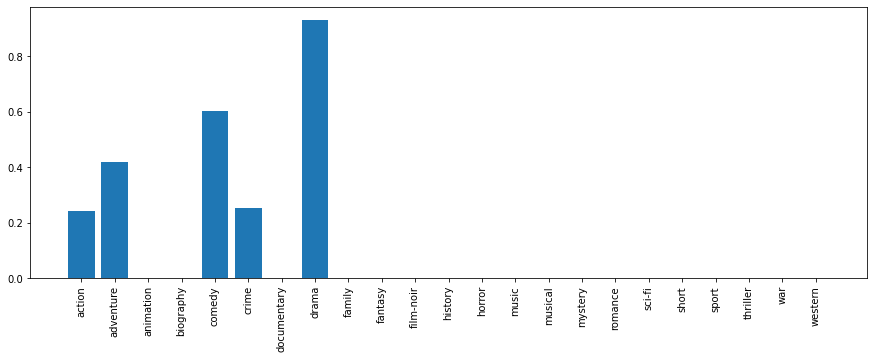

In [175]:
report_dict = classification_report(Cat_random.predict(test_X), np.array(test_y.drop('superhero', axis=1)), output_dict=True)
f1_scores = []
for i in report_dict:
    f1_scores.append(report_dict[i]['f1-score'])
plt.figure(figsize=(15,5))
plt.bar(np.arange(23), f1_scores[:23], tick_label = categories)
plt.xticks(rotation='vertical');

In [185]:
test_X

,action_CNN,adventure_CNN,animation_CNN,biography_CNN,comedy_CNN,crime_CNN,documentary_CNN,drama_CNN,family_CNN,fantasy_CNN,...,musical_BERT,mystery_BERT,romance_BERT,sci-fi_BERT,short_BERT,sport_BERT,superhero_BERT,thriller_BERT,war_BERT,western_BERT
0,-0.938074,-1.338009,-2.958893,-1.866706,-2.217278,-1.201684,-2.350115,0.634301,-2.833988,-1.952588,...,0.008384,0.014627,0.005832,0.887582,0.016606,0.015490,0.006602,0.023611,0.008237,0.010204
1,-1.364814,-1.493950,-2.178255,-2.522429,-0.527018,-1.164840,-2.673449,0.206856,-2.233801,-2.846449,...,0.041938,0.013725,0.073861,0.005894,0.085924,0.004647,0.004014,0.020525,0.020003,0.006689
2,-0.891687,-1.378087,-3.096992,-1.891021,-2.467596,-1.191511,-2.335397,0.651298,-2.958392,-1.858945,...,0.015495,0.024570,0.027355,0.007358,0.010485,0.005278,0.006502,0.020442,0.058506,0.011769
3,-1.211842,-1.412420,-2.355434,-2.089930,-0.945847,-1.000417,-2.526398,0.314019,-2.300101,-2.650148,...,0.148540,0.016989,0.081990,0.048893,0.011622,0.014622,0.012632,0.015074,0.025928,0.017546
4,-0.687184,-0.286186,-0.615789,-2.890615,-0.245290,-2.027764,-2.832923,-0.907443,-1.463861,-1.865952,...,0.025382,0.027900,0.079186,0.014151,0.015957,0.055024,0.007049,0.061598,0.836082,0.022802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,-0.974079,-1.187728,-2.142511,-2.412748,-0.770879,-1.455350,-2.471448,0.137571,-2.242802,-2.458422,...,0.006024,0.639951,0.002045,0.103963,0.012603,0.009842,0.003475,0.436857,0.005842,0.003162
646,-1.607271,-1.648532,-2.233601,-2.425692,-0.633494,-0.848120,-2.802314,0.160870,-2.195778,-3.032407,...,0.021723,0.024297,0.261779,0.014816,0.012134,0.006486,0.008312,0.005259,0.012125,0.010029
647,-1.989795,-2.074881,-2.793507,-2.738888,-0.721492,-0.748930,-3.285478,0.258964,-2.625457,-3.714146,...,0.046117,0.013433,0.073096,0.011050,0.893771,0.007203,0.005389,0.026553,0.014539,0.017301
648,-1.067652,-1.273285,-2.094059,-2.241104,-0.732626,-1.177108,-2.443129,0.162128,-2.182712,-2.490491,...,0.013298,0.031977,0.007184,0.008372,0.026063,0.006582,0.003415,0.146635,0.004090,0.011897


In [184]:
categories[7]

'drama'

In [195]:
test_fusion_df.iloc[7]['poster_location']

'./data/images/history/the_murders_at_white_house_farm.jpg'

In [193]:
print(test_fusion_df.iloc[7]['synopsis'])

Revolves around the true story of a fateful night in August 1985 when five members of the same family are murdered at an Essex farmhouse, and the ensuing police investigation and court case that follows.


In [176]:
df.loc[df.action==1]

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,musical,mystery,romance,sci-fi,short,sport,superhero,thriller,war,western
9,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2566,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2576,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2583,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
